In [1]:
import pandas as pd

from pa_tools.generators import PriceBasedPositionGenerator
from pa_tools.generators import HighLowBasedPositionGenerator

from pa_tools.models import PositionLimitModel
from pa_tools.models import PositionRankIndexModel
from pa_tools._visualizer import plot_fig

In [2]:
raw_ohlcv = pd.read_csv("./data/ohlcv.csv", index_col=0, low_memory=False)
raw_ohlcv.head()

,open,high,low,close,volume,change,stock_code
date,,,,,,,
2019-01-21,9660,9820,9650,9750,65445,0.011411,000020
2019-01-22,9750,9860,9660,9800,42143,0.005128,000020
2019-01-23,9840,9880,9740,9820,31492,0.002041,000020
2019-01-24,9820,10000,9710,10000,109714,0.018330,000020
2019-01-25,10000,10100,9920,9980,24176,-0.002000,000020


In [3]:
multi_ohlcv = raw_ohlcv.copy()

_stock_code = raw_ohlcv["stock_code"].sample(1).iloc[0]

single_ohlcv = raw_ohlcv[raw_ohlcv["stock_code"] == _stock_code].copy()
single_ohlcv.index = pd.to_datetime(single_ohlcv.index)
single_ohlcv.head()

,open,high,low,close,volume,change,stock_code
date,,,,,,,
2019-01-21,8710,8730,8430,8440,3954624,-0.025404,045390
2019-01-22,8460,8620,8400,8410,3043966,-0.003555,045390
2019-01-23,8390,8570,8360,8500,2322620,0.010702,045390
2019-01-24,8570,8630,8450,8470,2456999,-0.003529,045390
2019-01-25,8510,8650,8450,8530,2677695,0.007084,045390


In [4]:
pb_generator = PriceBasedPositionGenerator()

# 가격 기반
pb_rp = pb_generator.get_raw_position(prices=single_ohlcv["close"], time_size=60, position_size=100)
pb_rp_df = pb_generator.get_raw_position_df(
    prices=single_ohlcv["close"], time_size=60, position_size=100
)

In [5]:
# 가격/거래량 기반
pb_rvp = pb_generator.get_raw_volume_position(
    prices=single_ohlcv["close"], volumes=single_ohlcv["volume"], time_size=60, position_size=100
)
pb_rvp_df = pb_generator.get_raw_volume_position_df(
    prices=single_ohlcv["close"], volumes=single_ohlcv["volume"], time_size=60, position_size=100
)

In [6]:
# 시간가중 가격 기반
pb_tdp = pb_generator.get_time_dependent_position(
    prices=single_ohlcv["close"], time_size=60, position_size=100
)
pb_tdp_df = pb_generator.get_time_dependent_position_df(
    prices=single_ohlcv["close"], time_size=60, position_size=100
)

In [7]:
# 시간가중 가격 / 거래량 기반
pb_tdvp = pb_generator.get_time_dependent_volume_position(
    prices=single_ohlcv["close"], volumes=single_ohlcv["volume"], time_size=60, position_size=100
)
pb_tdvp_df = pb_generator.get_time_dependent_volume_position_df(
    prices=single_ohlcv["close"], volumes=single_ohlcv["volume"], time_size=60, position_size=100
)

In [8]:
df = single_ohlcv.tail(60)

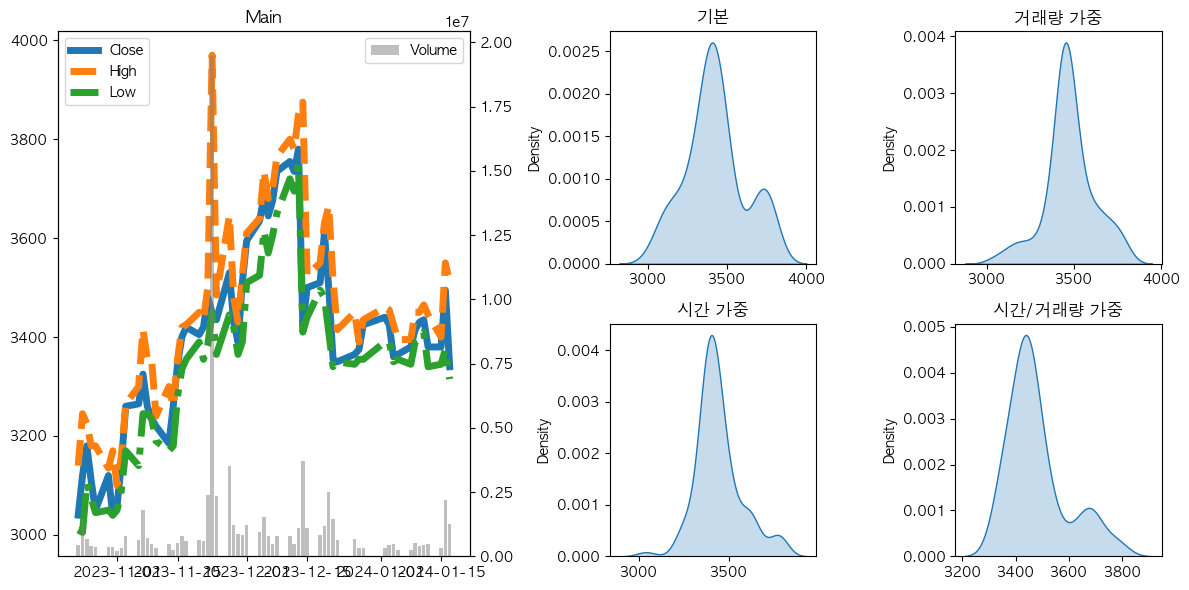

In [9]:
plot_fig(df, pb_rp, pb_rvp, pb_tdp, pb_tdvp)

In [10]:
hlb_generator = HighLowBasedPositionGenerator()

# 가격 기반
hlb_rp = hlb_generator.get_raw_position(
    highs=single_ohlcv["high"], lows=single_ohlcv["low"], time_size=60, position_size=100
)
hlb_rp_df = hlb_generator.get_raw_position_df(
    highs=single_ohlcv["high"], lows=single_ohlcv["low"], time_size=60, position_size=100
)

In [11]:
# 가격/거래량 기반
hlb_rvp = hlb_generator.get_raw_volume_position(
    highs=single_ohlcv["high"],
    lows=single_ohlcv["low"],
    volumes=single_ohlcv["volume"],
    time_size=60,
    position_size=100,
)
hlb_rvp_df = hlb_generator.get_raw_volume_position_df(
    highs=single_ohlcv["high"],
    lows=single_ohlcv["low"],
    volumes=single_ohlcv["volume"],
    time_size=60,
    position_size=100,
)

In [12]:
# 시간가중 가격 기반
hlb_tdp = hlb_generator.get_time_dependent_position(
    highs=single_ohlcv["high"], lows=single_ohlcv["low"], time_size=60, position_size=100
)
hlb_tdp_df = hlb_generator.get_time_dependent_position_df(
    highs=single_ohlcv["high"], lows=single_ohlcv["low"], time_size=60, position_size=100
)

In [13]:
# 시간가중 가격 / 거래량 기반
hlb_tdvp = hlb_generator.get_time_dependent_volume_position(
    highs=single_ohlcv["high"],
    lows=single_ohlcv["low"],
    volumes=single_ohlcv["volume"],
    time_size=60,
    position_size=100,
)
hlb_tdvp_df = hlb_generator.get_time_dependent_volume_position_df(
    highs=single_ohlcv["high"],
    lows=single_ohlcv["low"],
    volumes=single_ohlcv["volume"],
    time_size=60,
    position_size=100,
)

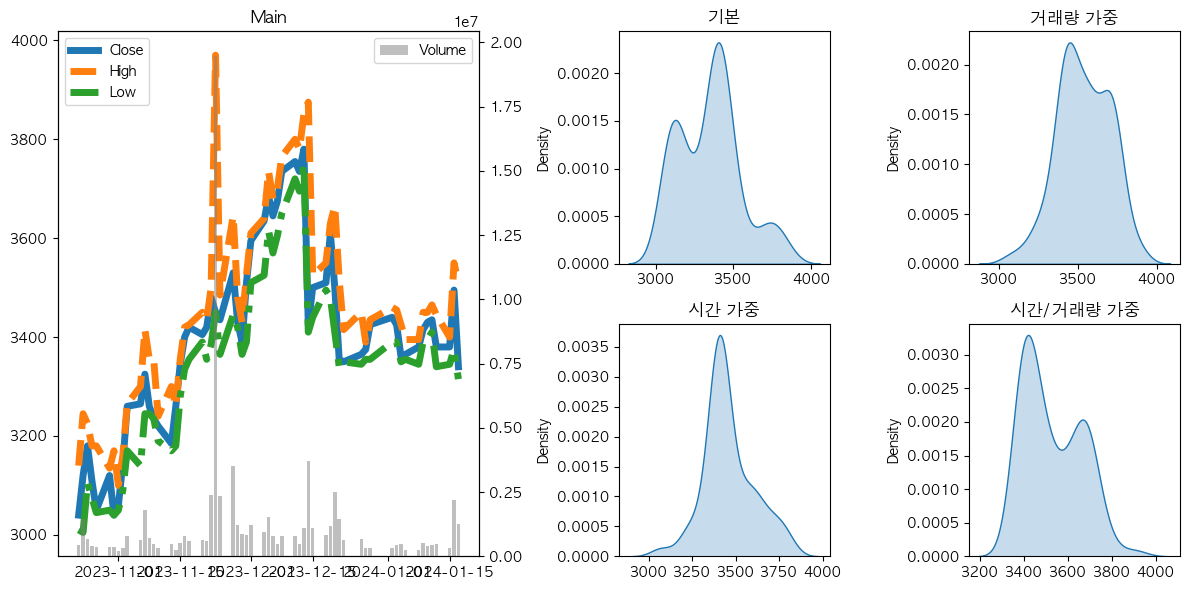

In [14]:
plot_fig(df, hlb_rp, hlb_rvp, hlb_tdp, hlb_tdvp)

In [15]:
pl_model = PositionLimitModel()
pl_model.calc(pb_tdvp)

(3423.48, 3510.3)

In [17]:
pri_model = PositionRankIndexModel()
pri_model.calc(single_ohlcv["close"].iloc[-1], pb_tdvp), single_ohlcv["close"].iloc[-1]

(1.0, 3340)